# Importing libraries

In [2]:
import tensorflow
import os
import numpy as np
import cv2
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.getcwd()

'C:\\Users\\shiri\\Desktop\\SHREE\\JUPYTER\\Suspicious Activity Detection using Neural Networks'

In [4]:
os.listdir('.')

['.git',
 '.ipynb_checkpoints',
 '1) Extract Frames.ipynb',
 '2) CNN - Image Classifier.ipynb',
 'desktop.ini',
 "don't ignore.txt",
 'frames',
 'README.md',
 'videos']

In [5]:
os.chdir('frames')

In [6]:
os.getcwd()
os.listdir('.')

['Fighting', 'Normal', 'Robbery']

In [7]:
PATH = '.'

In [8]:
folders = [folder for folder in os.listdir(PATH)]
for folder in folders:
    print(folder)

Fighting
Normal
Robbery


In [9]:
train_dir = '.'
os.listdir(train_dir)

['Fighting', 'Normal', 'Robbery']

# Loading Data

In [10]:
labels_dict = {
    'Fighting': 0,
    'Normal': 1,
    'Robbery': 2
}

def load_data():
    """
    Loads data and preprocess. Returns train and test data along with labels.
    """
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(labels_dict[folder])
    
    images = np.array(images)
    
    # Normalizing image data.
    images = images.astype('float32')/255.0
    
    # converting labels to one hot format.

    labels = keras.utils.to_categorical(labels)
    
    # creating training and test data by splitting original data into 95% of training data and 5% testing data.
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.05)
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [11]:
X_train, X_test, Y_train, Y_test = load_data()


LOADING DATA FROM : Fighting | Normal | Robbery | 
Loaded 33669 images for training, Train data shape = (33669, 64, 64, 3)
Loaded 1773 images for testing Test data shape = (1773, 64, 64, 3)


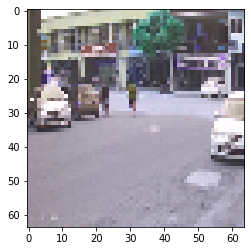

In [16]:
plt.imshow(X_train[0])
plt.show()

# Defining Model

In [20]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

In [21]:
def fit_model():
    model_hist = model.fit(X_train, Y_train, batch_size = 64, epochs = 5, validation_split = 0.1)
    return model_hist

# COMPILING THE MODEL AND FITTING THE TRAINING DATA


In [22]:
model = create_model()
curr_model_hist = fit_model()

MODEL CREATED
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7

# Plotting the model performance metrics to check model performance

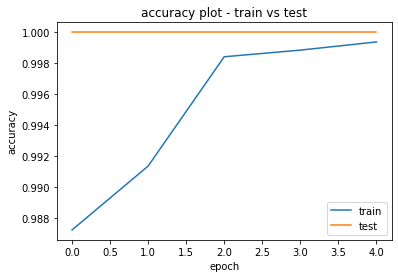

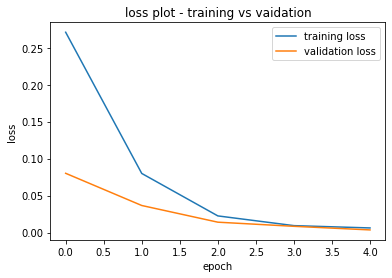

In [23]:

plt.plot(curr_model_hist.history['accuracy'])
plt.plot(curr_model_hist.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(curr_model_hist.history['loss'])
plt.plot(curr_model_hist.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# EVALUATING THE TRAINED MODEL ON THE TEST DATA SPLIT

In [24]:
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

1773/1773 [==============================] - 12s 7ms/step

Evaluation Accuracy =  99.94% 
Evaluation loss =  0.003608
